# Lotka Volterra Predator-Prey Model

---
## Analysis and Pseudo-Derivation

### Pseudo-Derivation

To derive the population dynamics of a predator prey species, I started with the instantaneous rate of change for both species to define the two differential equations I would be using. The rate of change for both are with respect to time, where x is the population of prey and y is the population of predators: $\frac{dx}{dt}$, $\frac{dx}{dt}$. As with most diff-eq's we've seen in class, there is a growth and decay portion to describe the change in populations over time.

For prey, growth is exponential and proportional to the population of prey (x) and the max prey growth rate ($\alpha$). The decay is proportional to the effect of predators on the prey death rate ($\beta$), and the population of predators (y) and prey (x) meeting.  For predators, growth is proportional to the effect of prey on the predator growth rate ($\delta$), and the population of prey (x) and predators (y) meeting. The decay is proportional to the population of predators (y) and the max predator death rate ($\gamma$). This produces the following two diff-eq's:

$\frac{dx}{dt} = \alpha x - \beta xy$

$\frac{dy}{dt} = \delta xy - \gamma y$

NOTE: $\alpha$, $\beta$, $\delta$, and $\gamma$ are biologically determined constants


### Biological Assumptions

The model makes several assumptions, most of which aren't realistic but are necessary to model:

1. Prey growth is exponential and has unlimited resources
2. Exponential decay of predators in the absence of prey
3. If the prey population is zero, the predator population will also be zero, and vice versa
4. The predator population is entirely dependent on the prey population
5. Genetic adaptations/mutations are not considered
6. Population dynamics is not affected by local predator/prey distribution

---

## Simulation

- Runge-Kutta was used to solve for more accuracy
- Simulated for 5 different initial conditions.

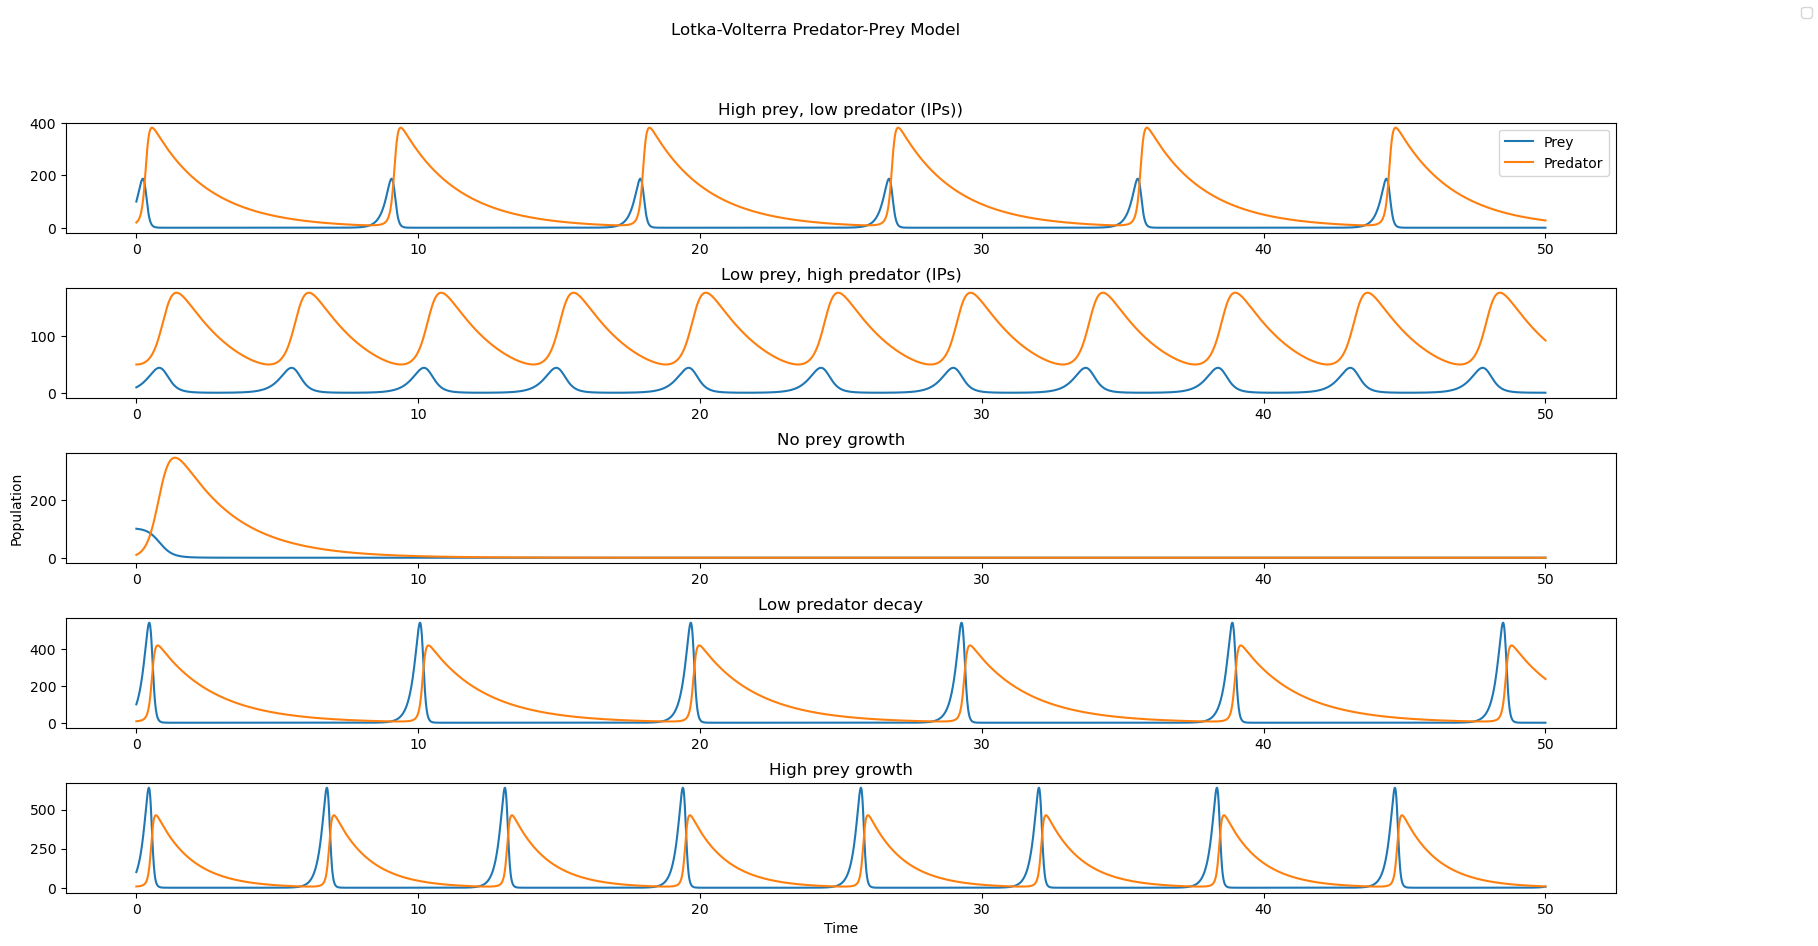

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Lotka-Volterra equation
def lotka_volterra_ODE(t, xy, alpha, beta, gamma, delta):
    """
    Lotka-Volterra ODE system for prey and predator population dynamics.
        Input: xy is a 2D array with x = xy[0] and y = xy[1]
        Returns: Array of the derivatives [dx/dt, dy/dt]
    """
    x, y = xy
    dx = alpha * x - beta * x * y
    dy = delta * x * y - gamma * y
    return np.array([dx, dy])

# Time step and number of steps
dt = .01
total_time = 50
num_steps = int(total_time / dt) 


# def euler_method(alpha, beta, gamma, delta, xy_o):
#     # Initialize arrays
#     time_axis = np.zeros(num_steps + 1)
#     xy = np.zeros((num_steps + 1, len(xy_o)))

#     # Initialize
#     time_axis[0] = 0
#     xy[0] = xy_o

#     # Euler method
#     for i in range(0, num_steps):
#         xy[i+1] = xy[i] + dt * lotka_volterra_ODE(time_axis[i], xy[i], alpha, beta, gamma, delta)
#         time_axis[i+1] = time_axis[i] + dt

#     return xy, time_axis


def runge_kutta_fourthOrder(alpha, beta, gamma, delta, xy_o):

    # Initialize arrays
    time_axis = np.zeros(num_steps + 1)
    xy = np.zeros((num_steps + 1, len(xy_o)))

    # Initialize
    time_axis[0] = 0
    xy[0] = xy_o


    # Runge-Kutta 4th order
    for i in range(0, num_steps):
        k1 = dt * lotka_volterra_ODE(time_axis[i], xy[i], alpha, beta, gamma, delta)
        k2 = dt * lotka_volterra_ODE(time_axis[i] + dt/2, xy[i] + k1/2, alpha, beta, gamma, delta)
        k3 = dt * lotka_volterra_ODE(time_axis[i] + dt/2, xy[i] + k2/2, alpha, beta, gamma, delta)
        k4 = dt * lotka_volterra_ODE(time_axis[i] + dt, xy[i] + k3, alpha, beta, gamma, delta)

        # Update the next value of time and y
        time_axis[i+1] = time_axis[i] + dt
        xy[i+1] = xy[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return xy, time_axis


initCon = [ [5, .05, .5, .05, np.array([100, 20])],    # High prey, low predator (initial conds)
            [5, .05, .5, .05, np.array([10, 50])],    # Low prey, high predator (initial conds)
            [0, .01, .5, .05, np.array([100, 10])],    # No prey growth
            [5, .05, .5, .02, np.array([100, 8])],     # Low predator death
            [5.5, .05, .8, .02, np.array([100, 8])]]     # High prey growth

conditionLabels = ['High prey, low predator (IPs))',
                    'Low prey, high predator (IPs)',
                      'No prey growth',
                        'Low predator decay',
                          'High prey growth']


fig, axes = plt.subplots(5,1, figsize=(20, 10))
axes[2].set_ylabel('Population')
axes[4].set_xlabel('Time')
fig.subplots_adjust(hspace = .5)
fig.legend(['Prey', 'Predator'])
fig.suptitle('Lotka-Volterra Predator-Prey Model')

phase_plot_data = []

for i, ax in enumerate(axes.flat):
    xy, time_axis = runge_kutta_fourthOrder(initCon[i][0], initCon[i][1], initCon[i][2], initCon[i][3], initCon[i][4])
    ax.plot(time_axis, xy)
    ax.set_title(conditionLabels[i])
    if i == 0:
        ax.legend(['Prey', 'Predator'])
    phase_plot_data.append(xy)

plt.show()

---
## Phase Plane Analysis

### Phase Plane Plot

To plot the phase plane for the predator prey model, I thought I had to combined the equations to remove the time dependency, then separate by terms.

$\frac{dy}{dx} = \frac{\delta xy - \gamma y}{\alpha x - \beta xy}$

$1 = \frac{\delta xy - \gamma y}{\alpha x - \beta xy} * \frac{dx}{dy}$

$0 = \frac{\delta x - \gamma}{x}dx + \frac{\beta y - \alpha}{y}dy$

I then realized that I did not need to do that, and instead built the phase plane by plotting the results from the above script for the populations of predator vs prey as the x and y axis.

### Fixed Points Points & Stability

The above work was instead used to find the fixed points points where the changes in populations would be zero.

$0 = \frac{\delta x - \gamma}{x}dx$, and $0 = \frac{\beta y - \alpha}{y}dy$. These were solved to get (0,0) and ($\frac{\gamma}{\delta}$, $\frac{\alpha}{\beta}$)

The stability of each fixed point can be seen from the stream plots. The point at the origin is unstable (shown in the plots as the black dot), and the other point, ($\frac{\gamma}{\delta}$, $\frac{\alpha}{\beta}$), is stable (shown as the colored dots). The point at the origin is interesting because while it's a fixed point, the instability means that it's difficult to reach biologically, and represents the dying off of both species. Either species can get very close to zero, but it's unlikely that both will be exactly zero at the same time. The other point is where the populations will stabilize and oscillate around non-zero values. This is the more likely scenario.







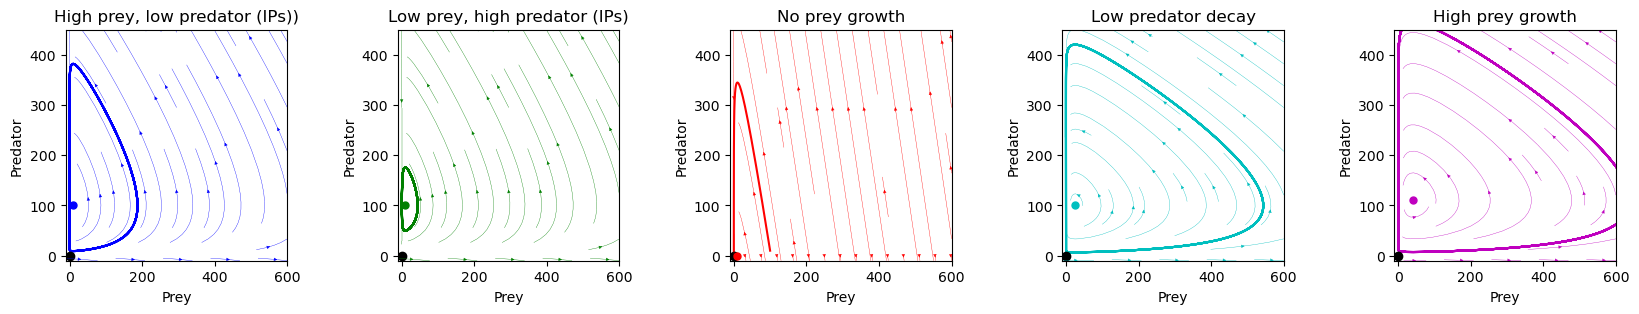

In [13]:

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

# Phase plot
fig, ax = plt.subplots(1,5, figsize=(20, 3))
fig.subplots_adjust(wspace = .5)
# fig.suptitle('Phase Plot of Lotka-Volterra Predator-Prey Model')


for i, ax in enumerate(ax.flat):
    ax.plot(phase_plot_data[i][:,0], phase_plot_data[i][:,1], color=colors[i])

    # Set xlims and ylims
    ax.set_xlim([-10, 600])
    ax.set_ylim([-10, 450])

    # Plot equilibrium points
    ax.plot(0, 0, 'ko')
    x = initCon[i][2] / initCon[i][3]
    y = initCon[i][0] / initCon[i][1]
    ax.plot(x, y, color= colors[i], marker='o', markersize=5)

    # Set labels
    ax.set_xlabel('Prey')
    ax.set_ylabel('Predator')
    ax.set_title(conditionLabels[i])

    # Streamplot
    x = np.linspace(-10, 600, 20)
    y = np.linspace(-10, 600, 20)
    X, Y = np.meshgrid(x, y)
    U = initCon[i][0] * X - initCon[i][1] * X * Y
    V = initCon[i][3] * X * Y - initCon[i][2] * Y
    ax.streamplot(X, Y, U, V, color=colors[i], density=.5, arrowsize=.5, linewidth=.25)

plt.show()


---
## Report

I discovered that the Runge-Kutta method was more accurate than the Euler method through some guided experimentation (4). I had't used the Runge-Kutta 4th Order method (or at least I don't remember it, it's been a while since DiffEq), and found it to be an neat way to find numerical approximations instead of the Euler method. 

For the simulation, plotting the dynamics between starting with high pry and low predator (and vice versus) yielded expected results and confirmed the model was functional. When the initial prey population was high, the predator population would increase, then the prey population would decrease, and then the predator population would decrease. The opposite was true when the initial predator population was high. This created that response-oscillation pattern. When the predator initial population was set high (but not too high) the the prey would become almost extinct, then the predator would die off, and the prey would recover. Then repeat! In the phase diagrams, it's clear that the predator and prey populations oscillate around the stable fixed point. When the prey generation rate was set too low to sustain, and the predators were relatively low, there was initial growth in the predator and prey until the prey population was too low to sustain the predator population, and both died off. This is an example of the zero fixed point of extinction. and is shown well in the phase plane plot where the arrows go up, then straight down to the origin.

I haven't done much with phase plots, and found it very interesting to see how the similarities between the bottom two plots on the time/population graph were were carried over to the phase plots. Eliminating the time component made it very clear to see the dynamics of how each species interacted, without the spatial component of time getting in the way. The stream plots were also very helpful in visualizing the stability of the fixed points without having to do the math to find the eigenvalues of the Jacobian matrix.

The model appears to be a good 'rough' approximation, and I can see it being used in a variety of cyclic applications ranging from disease responses to treatments, infectious diseases, and of course, predator prey relationships.

---

## Sources
- (1) https://web.mst.edu/~huwen/teaching_Predator_Prey_Tyler_Blaszak.pdf
- (2) https://en.wikipedia.org/wiki/Lotka–Volterra_equations
- (3) https://en.wikipedia.org/wiki/Paradox_of_the_pesticides
- (4) https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/5_Runge_Kutta_method.html
- (5) Kreyszig, Erwin. Advanced Engineering Mathematics, 8th Edition. Chapter 19, Pgs 956-961, 'Numerical Methods for Systems and Higher Order Equations'